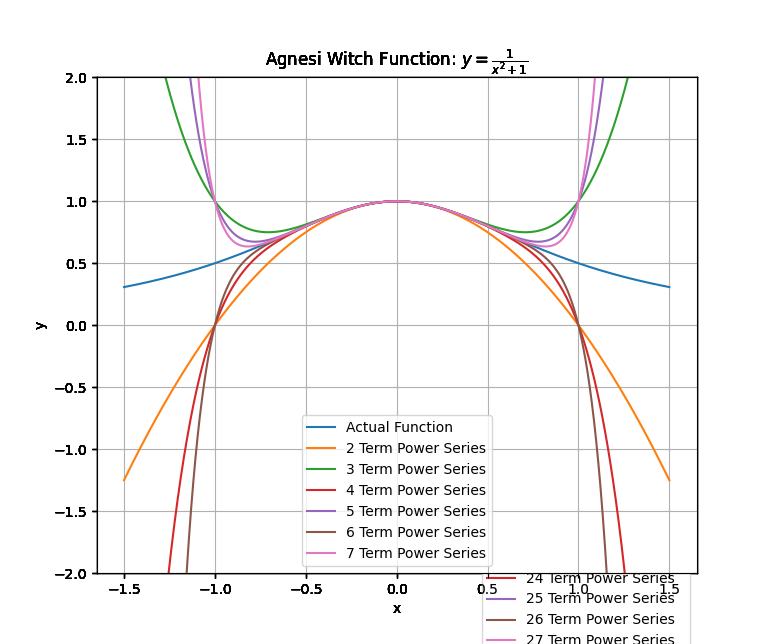

In [9]:
"""agnesi_witch.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, Expr, FunctionClass
from sympy import lambdify, symbols  # type: ignore

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    """Returns the y values of the Agnesi Witch Function for inputted x values"""
    return 1 / (x**2 + 1)


def plot_power_series(n: int, x_vals: NDArray[np.float_], ax: Axes) -> None:
    """Plots the power series of the Agnesi Witch Function"""
    x: Symbol = symbols("x")
    poly: float = 1.0
    # Builds the power series for subsequent terms and graphs each one separately
    for term in range(1, n):
        poly += ((-1) ** term) * (x ** (2 * term))
        fn_expr: Expr = poly.as_expr()  # type: ignore
        # Creates a graphable function that we then use in ax.plot
        fn_lambda: FunctionClass = lambdify(x, fn_expr, modules="numpy")  # type: ignore
        ax.plot(x_vals, fn_lambda(x_vals), label=f"{term + 1} Term Power Series")


def plot(ax: Axes) -> None:
    """Plots the Agnesi Witch Function and the Power Series Equivalents"""
    x_vals: NDArray[np.float_] = np.linspace(-1.5, 1.5, 1000)
    plt.plot(x_vals, f(x_vals), label="Actual Function")

    # Plots the power series of the function
    plot_power_series(7, x_vals, ax)

    # Sets the graph's title and labels
    ax.set_title("Agnesi Witch Function: " + r"$y = \frac {1} {x^2 + 1}$")
    ax.set_ylabel("y")
    ax.set_xlabel("x")
    ax.grid()
    ax.legend()
    ax.set_ylim(-2, 2)


def main() -> None:
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


main()



In [ ]:
"""
This is my theory:

The Agnesi Witch function mimics the y  values that we observe when we trace a circle centered at (.5,5). This can be more easily shown with a demonstration which I saw on https://mathworld.wolfram.com/WitchofAgnesi.html very clearly. This makes it easy to visualize. When x = -1 or x = 1, the point on the circle we are observing are the leftmost and rightmost edges. These points have an undefined / vertical slope. When the power series attempts to use a polynomial to mimic the points, it struggled at these boundaries due to Runge's phenomenon. Because the circle we are tracing has an undefined slope, the power series extremely oscillates attempting to match the points correctly. That is why as the degree of the power series expands, it quickly diverges at the boundaries. 
"""
